In [1]:
import os # To check whether file exists
import json # To save GPS coordinates as a JSON file
from geopy.geocoders import Nominatim # To get districts' GPS coordinates
import numpy as np # Math stuff
from matplotlib import pyplot as plt # To plot histogram

In [2]:
# To compute distance between two (lat,long) coords on the globe (for those of us who believe the earth is round)
def haversine_distance(lat1, long1, lat2, long2):
    phi1 = (90.0 - lat1)*np.pi/180.0
    phi2 = (90.0 - lat2)*np.pi/180.0
    theta1 = long1*np.pi/180.0
    theta2 = long2*np.pi/180.0
    cos = min(1,np.sin(phi1)*np.sin(phi2)*np.cos(theta1 - theta2) + np.cos(phi1)*np.cos(phi2))
    arc = np.arccos(cos)
    return 6373*arc
#end

In [3]:
# Obtain district names
district_names = [x.strip() for x in open('bairros.txt','r').readlines()]

In [4]:
# Obtain geolocator
geolocator = Nominatim()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [5]:
# Save district locations to JSON file
if not os.path.isfile('district_locations.json'):
    district_locations = {}
    for district in district_names:
        location = geolocator.geocode(f'{district}, Porto Alegre')
        district_locations[district] = (location.latitude, location.longitude)
        print(f'{district} lat={location.latitude} lon={location.longitude}')
    #end
    json.dump(district_locations,open('district_locations.json','w'))
#end
district_locations = json.load(open('district_locations.json','r'))

In [6]:
# Compute dict mapping each district name to a list of (district,distance) tuples, sorted by distance
distances = { d1:sorted([ (d2,haversine_distance(*district_locations[d1],*district_locations[d2])) for d2 in district_names ], key=lambda x: x[1]) for d1 in district_names }

In [7]:
# Run a war simulation
def simulate():
    # Init map of occupations
    occupied_by = { district:district for district in district_names }

    # List of districts which are still in the game
    players = district_names.copy()

    while len(players) > 1:
        # Choose a random district
        random_district = np.random.choice(district_names)
        # Get closest enemy district
        for district,_ in distances[random_district]:
            if occupied_by[district] != occupied_by[random_district]:
                closest_enemy = district
                break
            #end
        #end
        # If random district is occupied, the occupier becomes the attacking district
        attacking_district = occupied_by[random_district]
        # If closest enemy is occupied, the occupier becomes the defending district
        defending_district = occupied_by[closest_enemy]
        # Closest enemy is now occupied by the attacking district
        occupied_by[closest_enemy] = attacking_district
        # If defending district occupies no districts, it is out of the game
        if not defending_district in occupied_by.values(): players.remove(defending_district);

        #print(f'{attacking_district}, através de {random_district}, conquista {closest_enemy} do {defending_district}')
    #end
    # Return winning district
    return players[0]
#end

In [8]:
# Run many simulations and keep track of the winners
simulations = 10**6
wins = { district:0 for district in district_names }
for i in range(simulations):
    winner = simulate()
    wins[winner] += 1
    
    if i % 10**3 == 0 and i != 0:
        sorted_districts = sorted(district_names, key=lambda x: wins[x])
        print(i, sorted_districts[-1], wins[sorted_districts[-1]], "%.2f" % (wins[sorted_districts[-1]] / i))
#end

1000 Extrema 101 0.10
2000 Extrema 197 0.10
3000 Extrema 302 0.10
4000 Extrema 394 0.10
5000 Extrema 495 0.10
6000 Extrema 579 0.10
7000 Extrema 670 0.10
8000 Extrema 759 0.09
9000 Lami 850 0.09
10000 Lami 958 0.10
11000 Lami 1045 0.10
12000 Lami 1116 0.09
13000 Extrema 1207 0.09
14000 Extrema 1318 0.09
15000 Extrema 1401 0.09
16000 Extrema 1492 0.09
17000 Extrema 1595 0.09
18000 Extrema 1692 0.09
19000 Extrema 1788 0.09
20000 Extrema 1885 0.09
21000 Extrema 1968 0.09
22000 Extrema 2065 0.09
23000 Extrema 2159 0.09
24000 Extrema 2245 0.09
25000 Extrema 2344 0.09
26000 Extrema 2433 0.09
27000 Extrema 2513 0.09
28000 Extrema 2601 0.09
29000 Lami 2686 0.09
30000 Extrema 2777 0.09
31000 Lami 2874 0.09
32000 Lami 2977 0.09
33000 Lami 3070 0.09
34000 Lami 3173 0.09
35000 Lami 3261 0.09
36000 Lami 3342 0.09
37000 Lami 3443 0.09
38000 Lami 3526 0.09
39000 Lami 3599 0.09
40000 Lami 3695 0.09
41000 Lami 3801 0.09
42000 Lami 3911 0.09
43000 Lami 3993 0.09
44000 Lami 4088 0.09
45000 Lami 4177 0.09

349000 Lami 32480 0.09
350000 Lami 32565 0.09
351000 Lami 32642 0.09
352000 Lami 32725 0.09
353000 Lami 32834 0.09
354000 Lami 32916 0.09
355000 Lami 33010 0.09
356000 Lami 33102 0.09
357000 Lami 33188 0.09
358000 Lami 33287 0.09
359000 Lami 33370 0.09
360000 Lami 33460 0.09
361000 Lami 33548 0.09
362000 Lami 33630 0.09
363000 Lami 33714 0.09
364000 Lami 33812 0.09
365000 Lami 33909 0.09
366000 Lami 33995 0.09
367000 Lami 34089 0.09
368000 Lami 34195 0.09
369000 Lami 34289 0.09
370000 Lami 34381 0.09
371000 Lami 34465 0.09
372000 Lami 34552 0.09
373000 Lami 34641 0.09
374000 Lami 34746 0.09
375000 Lami 34842 0.09
376000 Lami 34933 0.09
377000 Lami 35037 0.09
378000 Lami 35121 0.09
379000 Lami 35221 0.09
380000 Lami 35305 0.09
381000 Lami 35404 0.09
382000 Lami 35505 0.09
383000 Lami 35587 0.09
384000 Lami 35673 0.09
385000 Lami 35760 0.09
386000 Lami 35858 0.09
387000 Lami 35954 0.09
388000 Lami 36053 0.09
389000 Lami 36149 0.09
390000 Lami 36250 0.09
391000 Lami 36341 0.09
392000 Lami

706000 Lami 66020 0.09
707000 Lami 66120 0.09
708000 Lami 66223 0.09
709000 Lami 66303 0.09
710000 Lami 66383 0.09
711000 Lami 66475 0.09
712000 Lami 66570 0.09
713000 Lami 66666 0.09
714000 Lami 66780 0.09
715000 Lami 66874 0.09
716000 Lami 66975 0.09
717000 Lami 67065 0.09
718000 Lami 67153 0.09
719000 Lami 67237 0.09
720000 Lami 67330 0.09
721000 Lami 67427 0.09
722000 Lami 67535 0.09
723000 Lami 67628 0.09
724000 Lami 67715 0.09
725000 Lami 67816 0.09
726000 Lami 67916 0.09
727000 Lami 68015 0.09
728000 Lami 68106 0.09
729000 Lami 68207 0.09
730000 Lami 68307 0.09
731000 Lami 68397 0.09
732000 Lami 68481 0.09
733000 Lami 68568 0.09
734000 Lami 68659 0.09
735000 Lami 68763 0.09
736000 Lami 68860 0.09
737000 Lami 68961 0.09
738000 Lami 69059 0.09
739000 Lami 69139 0.09
740000 Lami 69239 0.09
741000 Lami 69334 0.09
742000 Lami 69427 0.09
743000 Lami 69521 0.09
744000 Lami 69608 0.09
745000 Lami 69699 0.09
746000 Lami 69804 0.09
747000 Lami 69904 0.09
748000 Lami 70006 0.09
749000 Lami

#1	| Lami                    has won 93486 wars 	| (9.35% total)
#2	| Extrema                 has won 91860 wars 	| (9.19% total)
#3	| Santa Rosa de Lima      has won 51589 wars 	| (5.16% total)
#4	| São Caetano             has won 35706 wars 	| (3.57% total)
#5	| Lageado                 has won 35291 wars 	| (3.53% total)
#6	| Rubem Berta             has won 33666 wars 	| (3.37% total)
#7	| Boa Vista do Sul        has won 29012 wars 	| (2.90% total)
#8	| Arquipélago             has won 23879 wars 	| (2.39% total)
#9	| Lomba do Pinheiro       has won 22530 wars 	| (2.25% total)
#10	| Pitinga                 has won 22197 wars 	| (2.22% total)
#11	| Vila Assunção           has won 20219 wars 	| (2.02% total)
#12	| Anchieta                has won 19834 wars 	| (1.98% total)
#13	| Belém Novo              has won 19791 wars 	| (1.98% total)
#14	| Morro Santana           has won 18851 wars 	| (1.89% total)
#15	| Mário Quintana          has won 18379 wars 	| (1.84% total)
#16	| Sarandi      

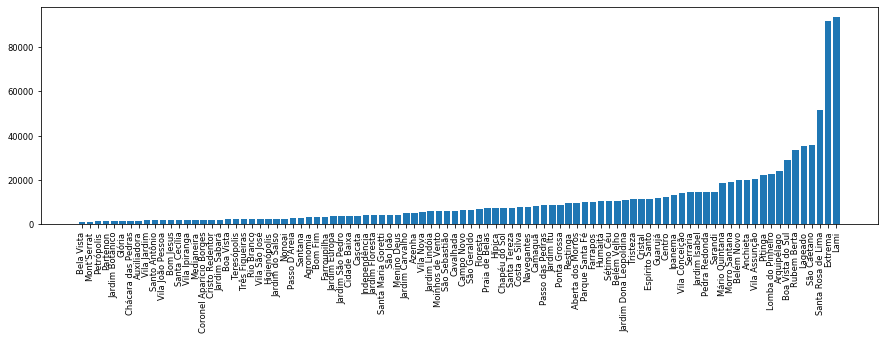

In [9]:
# Print results
sorted_districts = sorted(district_names, key=lambda x: wins[x])
for i,district in enumerate(sorted_districts[::-1]):
    print(f'#{i+1}\t| {str(district).ljust(23)} has won {wins[district]} wars \t| ({"%.2f" % (100*wins[district]/simulations)}% total)')
#end

# Plot histogram
fig,ax = plt.subplots(figsize=(15,4))
ax.bar(sorted_districts, [wins[x] for x in sorted_districts])
plt.xticks(rotation='vertical')
ax.tick_params(labelsize='small')
plt.show()